In [1]:
import numpy as np
import matplotlib.pyplot as plt

import gropt

%matplotlib inline

In [63]:
n_it = 2000  # Number of iterations for optimizer
smax = 200.0  # Slew rate in T/m/s
tmax = 0.7  # PNS threshold
gmax = 80.0 # Gradient max in mT/m
cushion = 1.0  # This will derate gmax, smax and tmax if needed

r_venc = 120.0  # Venc (cm/s)
r_res = np.array([-1.5, 1.5, 1.5])  # Resolution (mm)

E = np.array([[-1, 1, -1],
                  [-1, 1, 1],
                  [-1, -1, -1],
                  [1, 1, -1]])

r_m0 = 11.74 * 1.0 / r_res  # Convert to units M0
r_init_m1 = 7.33 * 80.0 / r_venc  # convert to M1



dt = 40e-3  # 40 us solve raster
N = 32 # How long the gradient is"


line_c = -1.0  # K-space line in ky, scaled to -1.0 to 1.0
par_c = -1.0  # K-space line in kz, scaled to -1.0 to 1.0

d_M0 = r_m0 * [1.0, line_c, par_c]


m1_shift = np.array([-5.28,4.16*line_c,4.56*par_c])
i = 0
d_M1 = E[i] * r_init_m1 + m1_shift


G, resid = gropt.opt3(N, d_M0, d_M1, dt=dt, n_it = n_it, cushion = cushion, gmax = gmax, smax = smax, tmax = tmax)
print(resid)

0.0006796504258783733


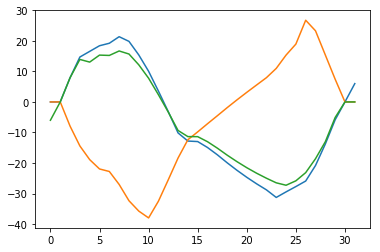

In [64]:
G3 = np.reshape(G, (3,-1))
plt.plot(G3.T)

In [61]:
# Repeat with no pns
tmax = 100.0
N = 29 # Shorter

i = 0
d_M1 = E[i] * r_init_m1 + m1_shift


G, resid = gropt.opt3(N, d_M0, d_M1, dt=dt, n_it = n_it, cushion = cushion, gmax = gmax, smax = smax, tmax = tmax)
print(resid)

0.0006369322776673877


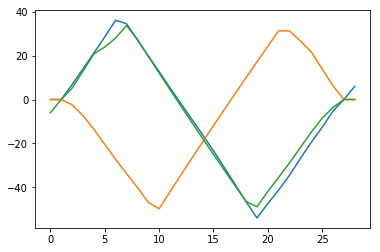

In [62]:
G3 = np.reshape(G, (3,-1))
plt.plot(G3.T)